<a href="https://colab.research.google.com/github/dharma610/Project/blob/master/LSTM_SEIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [373]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from random import sample
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [374]:
def deriv(y, t, N, beta, gamma, alpha, mu):
    S, E, I, R = y
    dSdt = mu - (beta * S * I) - mu*S
    dEdt = (beta * S * I)  - (mu + alpha)*E
    dIdt = (alpha*E) - (mu + gamma)*I
    dRdt = gamma*I   -  mu*R
    return dSdt, dEdt, dIdt, dRdt

In [375]:
""" gamma is a list of 1000 random number in (0,1) """

import random
gamma = []
for i in range(1000):
    gamma.append(random.uniform(0, 1))
    


In [376]:
""" alpha is a list of 1000 random number in (0.05,1) """

import random
alpha = []
for i in range(1000):
    alpha.append(random.uniform(0, 1))
    


In [377]:
""" multiplier is a list of 1000 random number in (1,3) """

import random
multiplier = []
for i in range(1000):
    multiplier.append(random.uniform(1,3))

In [378]:
""" beta is (1,3) times of gamma values """
# Multiplying two lists 
beta = [] 
for i in range(1000): 
    beta.append(gamma[i] * multiplier[i])

In [379]:
mu =  0.01333   #death or birth rate

In [380]:
""" P, Q, M, T are the list of S, E, I, R respectievely calculated for 100 days for each of  1000 sets of parameter (beta,gamma)."""
    
P = []
Q = []
M = []
T = []
for i in range(1000): #Plotted for 2 sets
  N = 1
  S0, E0, I0, R0 = 0.99,0.005,0.005,0   # initial conditions: one infected, rest susceptible
  t = np.linspace(0, 99, 100) # Grid of time points (in days)
  y0 = S0, E0, I0, R0 # Initial conditions vector
  # Integrate the SEIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(N, beta[i], gamma[i], alpha[i],mu))
  S, E, I, R = ret.T
  P.append(S)
  Q.append(E)
  M.append(I)
  T.append(R)

  

In [381]:
""" list to dataftrame """

S_value = pd.DataFrame(P)
E_value = pd.DataFrame(Q)
I_value = pd.DataFrame(M)
R_value = pd.DataFrame(T)

In [382]:
train  = S_value.iloc[0][0:70]
test  = S_value.iloc[0][70:]

In [383]:
train = np.array(train).reshape(70,1)
test = np.array(test).reshape(30,1)
#train

In [384]:
from sklearn.preprocessing import MinMaxScaler

In [385]:
scaler = MinMaxScaler()
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [386]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [387]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

In [389]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [390]:
# What does the first batch look like?
X,y = generator[0]

In [391]:

# define model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [392]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 64)                16896     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [393]:
# fit model
model.fit_generator(generator,epochs=50)

Epoch 1/50
58/58 [==============================] - 1s 11ms/step - loss: 0.0263
Epoch 2/50
58/58 [==============================] - 0s 5ms/step - loss: 5.7862e-04
Epoch 3/50
58/58 [==============================] - 0s 6ms/step - loss: 1.2290e-04
Epoch 4/50
58/58 [==============================] - 0s 6ms/step - loss: 1.2364e-04
Epoch 5/50
58/58 [==============================] - 0s 5ms/step - loss: 2.0644e-04
Epoch 6/50
58/58 [==============================] - 0s 6ms/step - loss: 4.1261e-05
Epoch 7/50
58/58 [==============================] - 0s 5ms/step - loss: 3.1844e-05
Epoch 8/50
58/58 [==============================] - 0s 5ms/step - loss: 3.8925e-05
Epoch 9/50
58/58 [==============================] - 0s 7ms/step - loss: 4.2406e-05
Epoch 10/50
58/58 [==============================] - 0s 6ms/step - loss: 6.1412e-05
Epoch 11/50
58/58 [==============================] - 0s 6ms/step - loss: 2.2409e-05
Epoch 12/50
58/58 [==============================] - 0s 6ms/step - loss: 4.3836e-05
Epoc

In [394]:
model.history.history.keys()

dict_keys(['loss'])

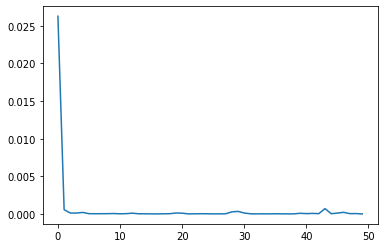

In [395]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [399]:
scaled_test

array([[-0.01004856],
       [-0.02003412],
       [-0.02995739],
       [-0.03981912],
       [-0.04962003],
       [-0.05936083],
       [-0.06904221],
       [-0.07866484],
       [-0.0882294 ],
       [-0.09773655],
       [-0.10718699],
       [-0.11658136],
       [-0.12592031],
       [-0.13520448],
       [-0.14443448],
       [-0.15361096],
       [-0.16273451],
       [-0.17180574],
       [-0.18082526],
       [-0.18979365],
       [-0.19871148],
       [-0.20757989],
       [-0.21639805],
       [-0.22516747],
       [-0.23388865],
       [-0.2425621 ],
       [-0.25118833],
       [-0.25976784],
       [-0.26830113],
       [-0.27678871]])

In [396]:
first_eval_batch = scaled_train[-12:]


In [397]:
first_eval_batch

array([[0.11491417],
       [0.10412082],
       [0.09339929],
       [0.08274873],
       [0.0721683 ],
       [0.06165716],
       [0.05121447],
       [0.04083944],
       [0.03053126],
       [0.02028915],
       [0.01011232],
       [0.        ]])

In [400]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [401]:
model.predict(first_eval_batch)

array([[-0.00011252]], dtype=float32)

In [402]:
scaled_test

array([[-0.01004856],
       [-0.02003412],
       [-0.02995739],
       [-0.03981912],
       [-0.04962003],
       [-0.05936083],
       [-0.06904221],
       [-0.07866484],
       [-0.0882294 ],
       [-0.09773655],
       [-0.10718699],
       [-0.11658136],
       [-0.12592031],
       [-0.13520448],
       [-0.14443448],
       [-0.15361096],
       [-0.16273451],
       [-0.17180574],
       [-0.18082526],
       [-0.18979365],
       [-0.19871148],
       [-0.20757989],
       [-0.21639805],
       [-0.22516747],
       [-0.23388865],
       [-0.2425621 ],
       [-0.25118833],
       [-0.25976784],
       [-0.26830113],
       [-0.27678871]])

In [403]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [404]:
test_predictions

[array([-0.00011252], dtype=float32),
 array([-0.00610308], dtype=float32),
 array([-0.01137662], dtype=float32),
 array([-0.01600512], dtype=float32),
 array([-0.02005669], dtype=float32),
 array([-0.0236209], dtype=float32),
 array([-0.02678539], dtype=float32),
 array([-0.02948019], dtype=float32),
 array([-0.0317805], dtype=float32),
 array([-0.03365509], dtype=float32),
 array([-0.03518806], dtype=float32),
 array([-0.03642934], dtype=float32),
 array([-0.03740679], dtype=float32),
 array([-0.03826379], dtype=float32),
 array([-0.03895856], dtype=float32),
 array([-0.03952676], dtype=float32),
 array([-0.03997985], dtype=float32),
 array([-0.04034994], dtype=float32),
 array([-0.04065148], dtype=float32),
 array([-0.04089138], dtype=float32),
 array([-0.04108649], dtype=float32),
 array([-0.04124453], dtype=float32),
 array([-0.0413713], dtype=float32),
 array([-0.0414735], dtype=float32),
 array([-0.04155524], dtype=float32),
 array([-0.04162176], dtype=float32),
 array([-0.04167

In [341]:
true_predictions = scaler.inverse_transform(test_predictions)

In [342]:
true_predictions

array([[0.49816855],
       [0.49319427],
       [0.48731189],
       [0.48077314],
       [0.47386985],
       [0.46695595],
       [0.46024642],
       [0.45378842],
       [0.44773735],
       [0.44221442],
       [0.43728263],
       [0.43302219],
       [0.42944304],
       [0.42647407],
       [0.42418252],
       [0.42255501],
       [0.42154498],
       [0.4210728 ],
       [0.42109301],
       [0.4215675 ],
       [0.4224429 ],
       [0.42364709],
       [0.42512746],
       [0.42682681],
       [0.42869724],
       [0.43069325],
       [0.43276082],
       [0.43486395],
       [0.43696856],
       [0.43903019]])

In [343]:
test = pd.DataFrame(test)

In [344]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

In [345]:
test

,0,Predictions
0,0.499045,0.498169
1,0.490481,0.493194
2,0.479282,0.487312
3,0.465355,0.480773
4,0.448788,0.473870
5,0.429893,0.466956
6,0.409223,0.460246
7,0.387540,0.453788
8,0.365732,0.447737
9,0.344694,0.442214


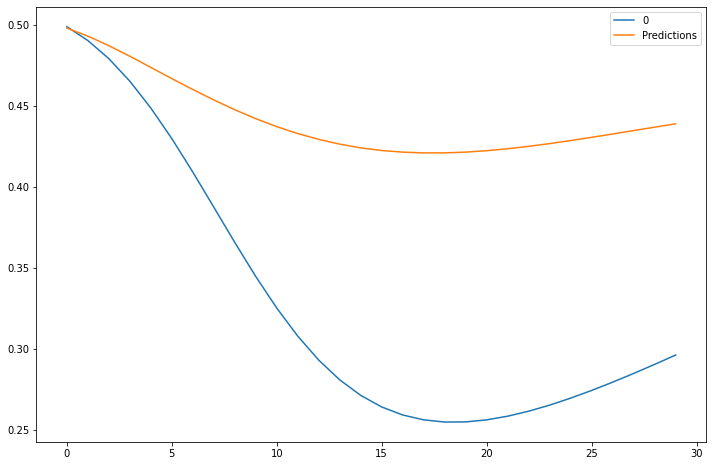

In [346]:
test.plot(figsize=(12,8))